In [1]:
#Import the required libraries

import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns

# import the file
df = pd.read_csv('Churn_Modelling.csv',error_bad_lines=False)

#print len(df)               #-- Check the number of rows
#df.columns                  #-- Check the columns

#Exited : flag indicating customer's churn status. 
    #0 : Existing customer
    #1 : Churned customer


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Check the customer split at Exited flag level
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

##### Finding : 

80-20 split for retained vs churned customers

In [3]:
#Convert categorical variables to string:
df['CustomerId']=df['CustomerId'].astype(str)
df['HasCrCard']=df['HasCrCard'].astype(str)
df['IsActiveMember']=df['IsActiveMember'].astype(str)

# Check the quick summmary of the table
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


##### Finding:
Level of the table = customerId : checked #rows = #rows when grouped by customerId

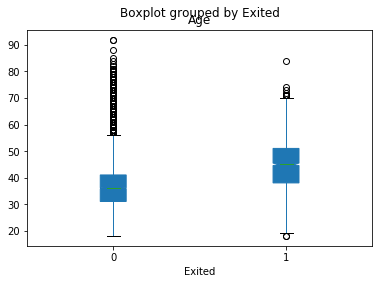

In [10]:
#Check the Age distribution at customer status split
df.boxplot(by='Exited',column=['Age'],grid=False,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True)


##### Findings:
- Older customers are more likely to churn
- Credit Score does not seem to be a very distinguishing factors based on the distribution

([<matplotlib.patches.Wedge at 0xef116d8>,
 [Text(0.248459,1.07157,'Female'), Text(-0.248458,-1.07157,'Male')],
 [Text(0.135523,0.584494,'42.7%'), Text(-0.135523,-0.584494,'57.3%')])

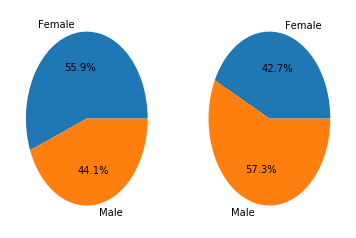

In [11]:
#DIstribution at Gender and Churn Flag (Exited) level 

df5=df.groupby(by=['Gender','Exited'])['RowNumber'].agg('count')
df4=df5.reset_index()
df_churn=df4[df4['Exited']==1][['Gender','RowNumber']]
df_ret=df4[df4['Exited']==0][['Gender','RowNumber']]


plt.subplot(1, 2, 1)
plt.pie(df_churn['RowNumber'],labels=df_churn['Gender'],autopct='%1.1f%%')
plt

plt.subplot(1, 2, 2)
plt.pie(df_ret['RowNumber'],labels=df_ret['Gender'],autopct='%1.1f%%')

##### Finding:
- Women are more likely to churn than men

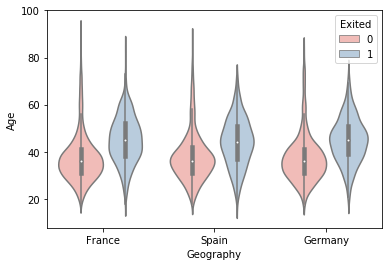

In [12]:
# Age distribution across countries and churn flag
sns.violinplot(x="Geography", y="Age",hue='Exited', data=df, palette="Pastel1")

##### Finding:
- German and older (by age) customers are more likely to churn

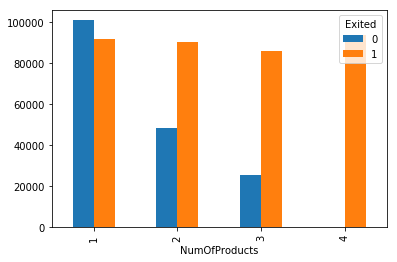

In [16]:
## number of products vs balance :

prod_plt=df.groupby(['NumOfProducts','Exited'])[['Balance']].agg('mean')

prod_plt=prod_plt.reset_index()

prod_plt.pivot("NumOfProducts","Exited","Balance").plot(kind='bar')

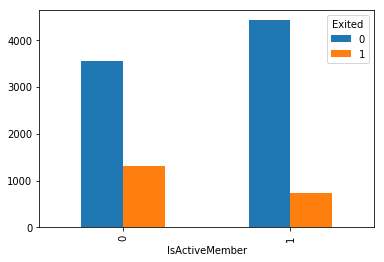

In [17]:
actv_plt=pd.DataFrame(df.groupby(['IsActiveMember','Exited'])['CustomerId'].count()) 
actv_plt=actv_plt.reset_index()
actv_plt.pivot("IsActiveMember","Exited","CustomerId").plot(kind='bar')


##### Finding:
- 37% of non-active members churn vs 17% of active members churn

In [15]:
card_plt=pd.DataFrame(df.groupby(['HasCrCard','Exited'])['CustomerId'].count()) 
card_plt

CustomerId
HasCrCard Exited            
0         0             2332
          1              613
1         0             5631
          1             1424

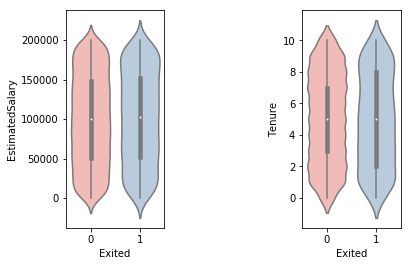

In [6]:
# Check the distribution of various variables across churned and existing customers

plt.subplot(1, 3, 1)
#Check the Estimated Salary distribution at customer status split
sns.violinplot(x="Exited", y="EstimatedSalary", data=df, palette="Pastel1")

plt.subplot(1, 3, 3)
#Check the Tenure distribution at customer status split
sns.violinplot(x="Exited", y="Tenure", data=df, palette="Pastel1")

##### Finding:
- 26% of customers without credit card churn vs 25.2% customers with credit card churn - => might not be a deciding fator

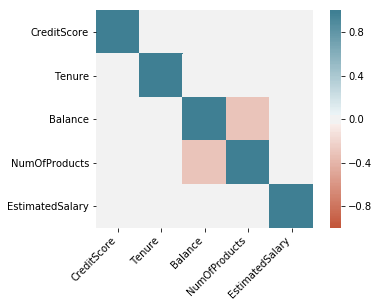

In [18]:
# Correlation Matrix Heat Map

df2=df[['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']]

corr = df2.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### Finding:
- No concernable correlation is observed between any two variables